# Persistence of tails

Despite the Central Limit Theorem guarantees convergence towards the normal distribution for a sum of random variables with finite variance, the sum of random variables with fat-tailed distributions with $\alpha \geq 2$, rests fat-tailed with the same exponent of the individual variables even if their variance is finite. The effect of the sum is to move
further away from the mean to the point where the power law tail starts. In the provided example, one can see that the complementary cumulative distributions display a linear trend in the log-log scale, indicating power law behavior. For n = 1 one has a pure power law which is observed to persist in the tails for large aggregations (n > 1), even for
n = 1000. One can notice that the power law tail starts at larger values of x and at lower probability levels with increasing aggregation.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

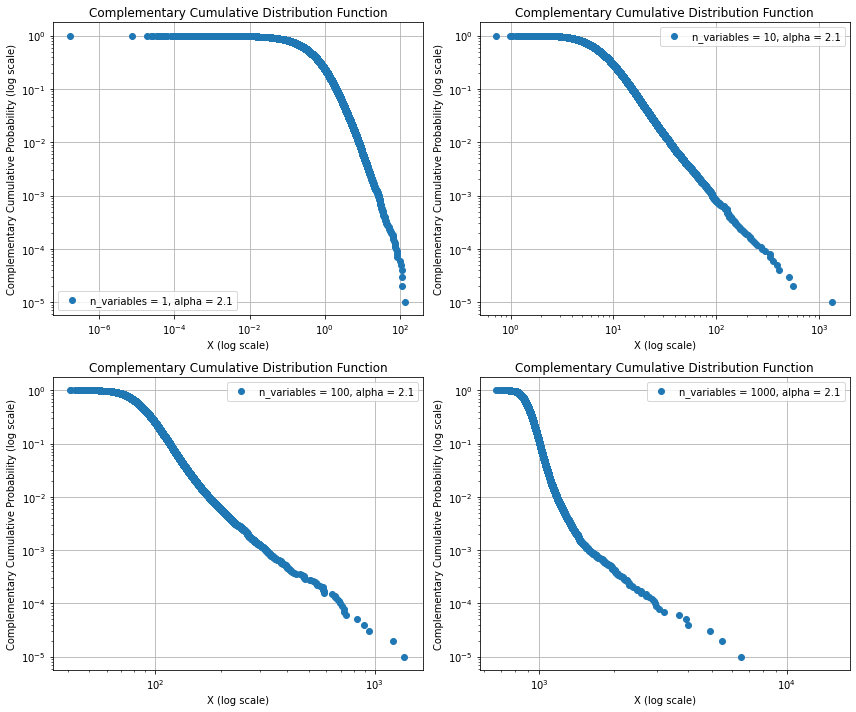

In [15]:
def power_law_distribution(alpha, size):
    return np.random.pareto(alpha, size=size)

def complementary_cumulative_distribution(data):
    data_sorted = np.sort(data)
    ccdf = 1.0 - np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    return data_sorted, ccdf

def plot_ccdf(x, y, alpha, n_variables, subplot_position):
    plt.subplot(subplot_position)
    plt.loglog(x, y, 'o', label=f'n_variables = {n_variables}, alpha = {alpha}')
    plt.xlabel('X (log scale)')
    plt.ylabel('Complementary Cumulative Probability (log scale)')
    plt.title('Complementary Cumulative Distribution Function')
    plt.legend()
    plt.grid(True)

# Parameters
n_samples = 100000  # Number of samples for each random variable
alpha = 2.1  # The value of alpha for the power-law distribution

# Values of n_variables for which to generate plots
n_variables_list = [1, 10, 100, 1000]

# Create a grid of subplots
plt.figure(figsize=(12, 10))

for i, n_variables in enumerate(n_variables_list):
    # Generate n_variables of power-law distributed random variables
    data = np.sum(power_law_distribution(alpha, (n_samples, n_variables)), axis=1)

    # Calculate the complementary cumulative distribution function (CCDF)
    x, ccdf = complementary_cumulative_distribution(data)

    # Determine the subplot position in the grid
    subplot_position = 221 + i

    # Plot the CCDF on a log-log scale
    plot_ccdf(x, ccdf, alpha, n_variables, subplot_position)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()